In [255]:
import numpy as np
import pandas as pd
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime,date
import datetime as dt
from collections import Counter
from matplotlib.ticker import FuncFormatter
import tensorflow as tf
import time

import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from sklearn.calibration import calibration_curve

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image


In [69]:
#load the data

file_path = Path('./Resources/serviced_dataframe_w_return.csv')
df = pd.read_csv('serviced_dataframe_w_return.csv')[:-2]


In [70]:
df.shape

(1040752, 37)

In [71]:
list(df)

['id',
 'application_type',
 'desc',
 'loan_amnt',
 'funded_amnt',
 'term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'open_acc',
 'pub_rec',
 'fico_range_high',
 'fico_range_low',
 'revol_bal',
 'revol_util',
 'total_pymnt',
 'recoveries',
 'last_pymnt_d',
 'year_months',
 'has_desc',
 'credit_hist',
 'loan_length',
 'term_num',
 'ret_low',
 'ret_high',
 'good',
 'emp_length_num']

In [72]:
# Identify the type of each of these column
float_cols = ['loan_amnt', 'funded_amnt','annual_inc',
                     'dti', 'revol_bal', 'delinq_2yrs', 'open_acc', 'pub_rec',
                                'fico_range_high', 'fico_range_low', 'total_pymnt', 'recoveries']
cat_cols = ['term', 'grade', 'sub_grade', 'desc', 'emp_length', 'home_ownership',
                    'verification_status', 'loan_status', 'purpose','application_type']
perc_cols = ['int_rate', 'revol_util','ret_low','ret_high']
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'year_months']

In [73]:
#define the loan status

#d =  {'Fully Paid':0, 'Charged Off':1, 'Default':1}

#df['loan_status'] = df['loan_status']. map(d)

In [74]:
#new FICO average

df['fico_avg'] = (df.fico_range_high + df.fico_range_low)/2

In [75]:
columns = [
 'application_type',
 'loan_amnt',
 'funded_amnt',
 'int_rate',
 'grade',
 'sub_grade',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'purpose',
 'dti',
 'delinq_2yrs',
 'open_acc',
 'pub_rec',
 'fico_avg',
 'fico_range_high',
 'fico_range_low',
 'revol_bal',
 'revol_util',
 'total_pymnt',
 'recoveries',
 'last_pymnt_d',
 'has_desc',
 'credit_hist',
 'loan_length',
 'term',
 'ret_low',
 'ret_high',
 'good',
 'emp_length_num'
]

target = ["good"]



In [76]:
df = df.loc[:, columns].copy()

In [77]:
# Create our features
X = df.copy()
X.drop('good', axis=1, inplace=True)

# Create our target
y = df['good']


In [78]:
to_drop = ['recoveries', 'total_pymnt', 'dti','last_pymnt_d',
         'revol_util', 'open_acc', 'pub_rec', 'revol_bal',
         'revol_util', 'delinq_2yrs','loan_length','fico_range_high','fico_range_low','ret_low','ret_high']

X.drop(to_drop, axis=1, inplace=True)



In [79]:
app =  {'Individual':0, 'Joint App':1}

X['application_type'] = X['application_type']. map(app)

In [80]:
grade =  {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}

X['grade'] = X['grade']. map(grade)

In [81]:
t =  {' 36 months':0, ' 60 months':1}

X['term'] = X['term']. map(t)

In [82]:
v =  {'Not Verified':0, 'Source Verified':1, 'Verified':2}

X['verification_status'] = X['verification_status']. map(v)

In [83]:
d =  {False:0, True:1}

X['has_desc'] = X['has_desc']. map(d)

In [233]:
sub_grades = sorted(df.sub_grade.unique())
sub_grades_dict = {x:sub_grades.index(x)+1 for x in sub_grades} 
sub_grades_dict_reverse = {v:k for k,v in sub_grades_dict.items()} 

X['sub_grade'] = X['sub_grade']. map(sub_grades_dict)


In [85]:
X.sample(3).T

,470883,78842,979547
application_type,0,0,1
loan_amnt,35000,35000,11100
funded_amnt,35000,35000,11100
int_rate,0.1757,0.2557,0.1699
grade,4,6,4
sub_grade,19,30,16
home_ownership,MORTGAGE,OWN,OWN
annual_inc,105000,155000,40000
verification_status,2,2,1
purpose,debt_consolidation,debt_consolidation,debt_consolidation


In [86]:
cat_col = ['home_ownership','purpose']

X = pd.get_dummies(X, columns=cat_col)

In [87]:
X.describe()

,application_type,loan_amnt,funded_amnt,int_rate,grade,sub_grade,annual_inc,verification_status,fico_range_high,fico_range_low,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
count,1.040752e+06,1.040752e+06,1.040752e+06,1.040752e+06,1.040752e+06,1.040752e+06,1.040752e+06,1.040752e+06,1.040752e+06,1.040752e+06,...,1.040752e+06,1.040752e+06,1.040752e+06,1.040752e+06,1.040752e+06,1.040752e+06,1.040752e+06,1.040752e+06,1.040752e+06,1.040752e+06
mean,7.756891e-03,1.472380e+04,1.472378e+04,1.294675e-01,2.753028e+00,1.171417e+01,7.711343e+04,1.010963e+00,6.979456e+02,6.939454e+02,...,6.354252e-02,3.820315e-03,1.986544e-02,1.082102e-02,6.519324e-03,5.376497e-02,6.043707e-04,9.622850e-03,6.310821e-03,1.345181e-05
std,8.773100e-02,8.685624e+03,8.685624e+03,4.576142e-02,1.283666e+00,6.382068e+00,7.162064e+04,7.552677e-01,3.048880e+01,3.048817e+01,...,2.439363e-01,6.169055e-02,1.395379e-01,1.034598e-01,8.047875e-02,2.255534e-01,2.457653e-02,9.762305e-02,7.918965e-02,3.667648e-03
min,0.000000e+00,1.000000e+03,1.000000e+03,5.320000e-02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.640000e+02,6.600000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,8.000000e+03,8.000000e+03,9.170000e-02,2.000000e+00,7.000000e+00,4.600000e+04,0.000000e+00,6.740000e+02,6.700000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.270000e+04,1.270000e+04,1.269000e-01,3.000000e+00,1.100000e+01,6.500000e+04,1.000000e+00,6.890000e+02,6.850000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,2.000000e+04,2.000000e+04,1.561000e-01,4.000000e+00,1.600000e+01,9.200000e+04,2.000000e+00,7.140000e+02,7.100000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,4.000000e+04,4.000000e+04,3.099000e-01,7.000000e+00,3.500000e+01,9.573072e+06,2.000000e+00,8.500000e+02,8.450000e+02,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [88]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)



In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(585423, 32)
(260188, 32)
(585423,)
(260188,)


In [90]:
# Creating StandardScaler instance
scaler = StandardScaler()


In [91]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)


In [92]:

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



## Neural Network

In [156]:
# Creating training, validation, and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=78)

In [181]:
# Model set-up
number_input_features = (X_train.shape[-1])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 100


In [182]:
# Define the LSTM RNN model
nn_model = Sequential()

# Layer 1
nn_model.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Layer 2
nn_model.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_model.add(Dense(1, activation="sigmoid"))

In [183]:
# Compile the model
nn_model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [184]:
# Summarize the model
nn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               3300      
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 13,501
Trainable params: 13,501
Non-trainable params: 0
_________________________________________________________________


In [185]:
# Training the model
batch_size = 1000
epochs = 50
training_history = nn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/50
586/586 [==============================] - 2s 4ms/step - loss: 90.6437 - accuracy: 0.6995 - tp: 387361.0000 - tn: 22117.0000 - fp: 90487.0000 - fn: 85458.0000 - precision: 0.8106 - recall: 0.8193 - auc: 0.5082 - val_loss: 40.1397 - val_accuracy: 0.6040 - val_tp: 98031.0000 - val_tn: 19843.0000 - val_fp: 17614.0000 - val_fn: 59653.0000 - val_precision: 0.8477 - val_recall: 0.6217 - val_auc: 0.5779
Epoch 2/50
586/586 [==============================] - 2s 4ms/step - loss: 63.2175 - accuracy: 0.6964 - tp: 384786.0000 - tn: 22914.0000 - fp: 89690.0000 - fn: 88033.0000 - precision: 0.8110 - recall: 0.8138 - auc: 0.5090 - val_loss: 59.0188 - val_accuracy: 0.8081 - val_tp: 157683.0000 - val_tn: 1.0000 - val_fp: 37456.0000 - val_fn: 1.0000 - val_precision: 0.8081 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 3/50
586/586 [==============================] - 2s 3ms/step - loss: 62.5953 - accuracy: 0.6984 - tp: 385706.0000 - tn: 23131.0000 - fp: 89473.0000 - fn: 87113.0000 - precision: 0.

In [186]:
# Evaluate the model
scores = nn_model.evaluate(X_test, y_test, verbose=0)

# Define metrics dictionary
nn_metrics = {k: v for k, v in zip(nn_model.metrics_names, scores)}

# Display evaluation metrics results
display(nn_metrics)

{'loss': 0.47748252749443054,
 'accuracy': 0.7975848317146301,
 'tp': 203259.0,
 'tn': 4263.0,
 'fp': 45637.0,
 'fn': 7029.0,
 'precision': 0.8166422843933105,
 'recall': 0.9665744304656982,
 'auc': 0.6728475093841553}

In [187]:

# Define the confusion matrix data
nn_cm_df = pd.DataFrame(
    {
        "Positive (1)": [f"TP={nn_metrics['tp']}", f"FP={nn_metrics['fn']}"],
        "Negative (0)": [f"FN={nn_metrics['fp']}", f"TN={nn_metrics['tn']}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
nn_cm_df.index.name = "Actual"
nn_cm_df.columns.name = "Predicted"

# Show the confusion matrix
nn_cm_df

Predicted,Positive (1),Negative (0)
Actual,,
Positive(1),TP=203259.0,FN=45637.0
Negative(0),FP=7029.0,TN=4263.0


In [188]:
# Predict classes using testing data
y_predict_classes = nn_model.predict_classes(X_test, batch_size=1000)

# Display classification report
print(classification_report(y_predict_classes, y_test))

              precision    recall  f1-score   support

           0       0.09      0.38      0.14     11292
           1       0.97      0.82      0.89    248896

    accuracy                           0.80    260188
   macro avg       0.53      0.60      0.51    260188
weighted avg       0.93      0.80      0.85    260188



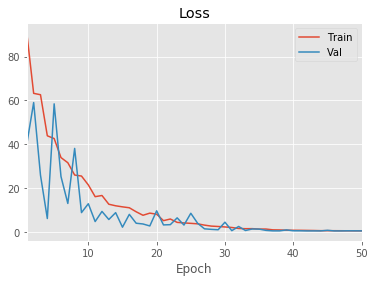

In [189]:
# Plotting loss
loss_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["loss"],
        "Val": training_history.history["val_loss"],
    }
)
loss_df.set_index("Epoch", inplace=True)
loss_df.plot(title="Loss")

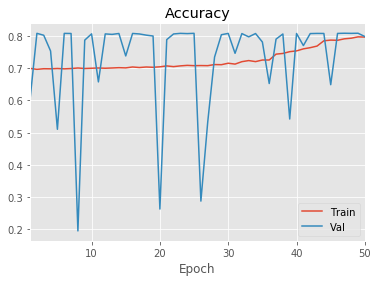

In [190]:
# Plotting accuracy
accuracy_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["accuracy"],
        "Val": training_history.history["val_accuracy"],
    }
)
accuracy_df.set_index("Epoch", inplace=True)
accuracy_df.plot(title="Accuracy")

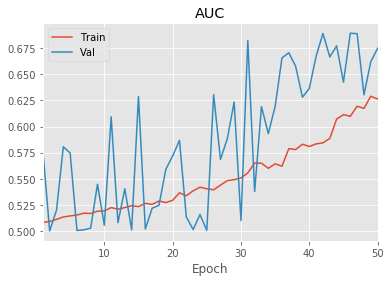

In [191]:
# Plotting AUC
auc_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["auc"],
        "Val": training_history.history["val_auc"],
    }
)
auc_df.set_index("Epoch", inplace=True)
auc_df.plot(title="AUC")

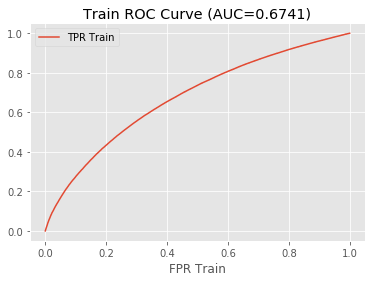

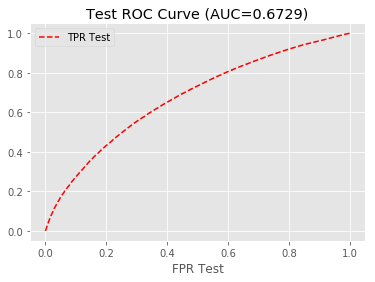

In [192]:
# Making predictions to feed the roc_curve module
train_predictions = nn_model.predict(X_train, batch_size=1000)
test_predictions = nn_model.predict(X_test, batch_size=1000)

# Calculate the ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_predictions)
auc_train = auc(fpr_train, tpr_train)
auc_train = round(auc_train, 4)

# Calculate the ROC curve and AUC for the testing set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_predictions)
auc_test = auc(fpr_test, tpr_test)
auc_test = round(auc_test, 4)

# Create a DataFrame with the fpr and tpr results
roc_df_train = pd.DataFrame({"FPR Train": fpr_train, "TPR Train": tpr_train,})
roc_df_test = pd.DataFrame({"FPR Test": fpr_test, "TPR Test": tpr_test,})

# Plotting the ROC Curves
roc_df_train.plot(
    x="FPR Train",
    y="TPR Train",
    xlim=([-0.05, 1.05]),
    title=f"Train ROC Curve (AUC={auc_train})",
)

roc_df_test.plot(
    x="FPR Test",
    y="TPR Test",
    color="red",
    style="--",
    xlim=([-0.05, 1.05]),
    title=f"Test ROC Curve (AUC={auc_test})",
)

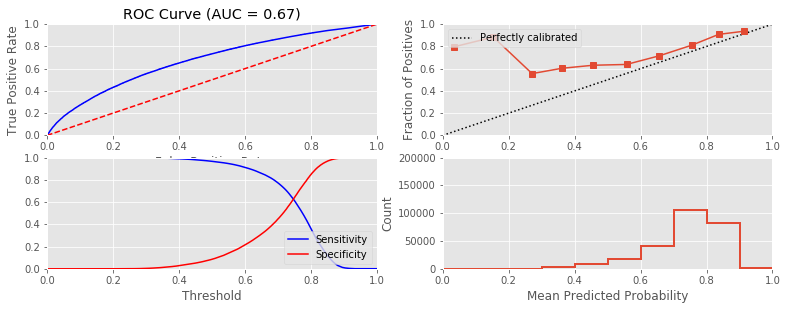

In [256]:
Y_score = nn_model.predict(X_test, batch_size=1000)
fpr = dict()
tpr = dict()
thresholds = dict()
fpr, tpr, thresholds = roc_curve(y_test, Y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
# plt.figure(figsize=(10,10))
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([-0.05, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.grid(True)
# plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
# plt.legend(loc="lower right", shadow=True, fancybox =True) 



plt.figure(figsize = (13, 4.5))
plt.subplot(2, 2, 1)

plt.title("ROC Curve (AUC = %0.2f)"% roc_auc_score(y_test, Y_score))
plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1]); plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.subplot(2, 2, 3)

plt.plot(thresholds, tpr, 'b', label = 'Sensitivity')
plt.plot(thresholds, 1 -fpr, 'r', label = 'Specificity')
plt.legend(loc = 'lower right')
plt.xlim([0,1]); plt.ylim([0,1])
plt.xlabel('Threshold')

plt.subplot(2, 2, 2)

fp_0, mpv_0 = calibration_curve(y_test, Y_score, n_bins = 10)
plt.plot([0,1], [0,1], 'k:', label='Perfectly calibrated')
plt.plot(mpv_0, fp_0, 's-')
plt.ylabel('Fraction of Positives')
plt.xlim([0,1]); plt.ylim([0,1])
plt.legend(loc ='upper left')

plt.subplot(2, 2, 4)
plt.hist(Y_score, range=(0, 1), bins=10, histtype="step", lw=2)
plt.xlim([0,1]); plt.ylim([0,200000])
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Count')

plt.show()

In [260]:
def normalize_arrays(fit_arr, *arrs):
    scaler = StandardScaler()
    fit_arr = scaler.fit_transform(fit_arr)
    out=[]
    for arr in arrs:
        out.append(scaler.transform(arr))
    return [fit_arr]+out


In [261]:
def predict_probs(X_train, X_test, y_train, y_test,
                   model_name,
                   select_top=[0.05, 0.1, 0.2],
                   show_plot=True
                   ):
    """Implement the cycle of training, predicting, and producing basic metrics
    Args:   X,Y  split into  train/val/test 
            model name
            hyperparameters
    Returns: arrays with Y_test {1:good,0:default) and Y_test_hat (probabilities)
             AUC_train, AUC_test
             precision and support metric for selected % of loans (HP select_top)
    """
    # 1. Split 5% validation, Normalize
    X_train, X_val, y_train, Y_val = train_test_split(X_train, y_train, test_size=0.05)
    X_train, X_val, X_test = normalize_arrays(X_train, X_val, X_test)
   

    # 2. train model
    model = RandomForestClassifier(n_estimators=500, random_state=34)
    model = model.fit(X_train, y_train)

   

    # 3. predict Y_train_hat, Y_test_hat

    y_train_hat = model.predict_proba(X_train)[:,1]
    y_test_hat = model.predict_proba(X_test)[:,1]

    # 4. Produce metrics
    AUC_train = roc_auc_score(y_train, y_train_hat)
    AUC_test = roc_auc_score(y_test, y_test_hat)
    fp_test, tp_test, thresholds = roc_curve(y_test, y_test_hat)

    support = np.nanmean(y_test)
    indices = np.searchsorted(thresholds[::-1], np.quantile(y_test_hat, 1-np.array(select_top)))
    precision = 1/(1 + (fp_test[-indices]/tp_test[-indices])*(1/support-1))
    precision = {k:v for k,v in zip(select_top, precision)}
    precision.update({1:support})

    # 5. Optional: plot roc, precision graph
    if show_plot:
        plot_roc(y_train_hat, y_test_hat, y_train, y_test, model_name)
    
    print(f'{AUC_train:.5f} {AUC_test:.5f} \n{precision}')
    
    # include Y_test in the output for verification purposes (Y_test<-->Y_test_hat)
    return y_test, y_test_hat, AUC_train, AUC_test, precision

In [262]:
def plot_roc(Y_train_hat, Y_test_hat, Y_train, Y_test, model_name):

    #AUC_train = roc_auc_score(Y_train, Y_train_hat)
    AUC_test = roc_auc_score(Y_test, Y_test_hat)

    #fp_train, tp_train, _ = roc_curve(Y_train, Y_train_hat)
    fp_test, tp_test, thresholds = roc_curve(Y_test, Y_test_hat)

    precision = 1/(1+ (1/np.mean(Y_test)-1)*(fp_test/tp_test))
    thresholds[0]=1  #sklearn may produce arbitrary first threshold > 1

    ref_thresholds = np.linspace(min(thresholds), max(thresholds),1000)
    selected = [np.nanmean(Y_test_hat>p) for p in ref_thresholds]

    _,axes = plt.subplots(1, 2, figsize=(14, 6))
    ax0,ax1=axes[0],axes[1]

    ax0.plot(fp_train, tp_train, label=f'Train. AUC={AUC_train:.4f}')
    ax0.plot(fp_test, tp_test, label=f'Test. AUC={AUC_test:.4f}')
    ax0.plot((0,1),(0,1), color='grey')
    ax0.plot((np.mean(Y_train)), (np.mean(Y_train)), color='grey', marker='o', label='random')
    ax0.set_xlabel('false positive rate')
    ax0.set_ylabel('recall')
    ax0.set_title(f'ROC: {model_name}')
    ax0.legend(loc='lower right')
    ax0.grid(True)

    ax1.plot(thresholds, precision, label=f'precision')
    ax1.plot(ref_thresholds, selected, label=f'selected %')
    ax1.set_xlabel('cutoff thresholds')
    ax1.set_title(f'Precision and selected %')
    ax1.legend(loc='lower right')
    ax1.invert_xaxis()
    ax1.grid(True)

    plt.show()

In [263]:
# a general report dataframe structure:
df_template = pd.DataFrame(columns=['model',
                                  'run',
                                  'n_loans',
                                  'AUC_test',
                                  'prec_5',
                                  'prec_10',
                                  'prec_20',
                                  'support',
                                  'ratio_5',
                                  'ratio_10',
                                  'ratio_20',

                                  ])
df_template

,model,run,n_loans,AUC_test,prec_5,prec_10,prec_20,support,ratio_5,ratio_10,ratio_20


In [264]:
# Looping through the function for each sub_grade:
predictions = pd.DataFrame(columns=['good','p'])
model_name = 'neural net'
df_report = df_template.copy()

# for term in (0,1):
for sub_grade in range(1,35):

    X_train_s = X_train[X_train.sub_grade==sub_grade]
    X_test_s = X_test[X_test.sub_grade==sub_grade]
    y_train_s = y_train[X_train.sub_grade==sub_grade]
    y_test_s = y_test[X_test.sub_grade==sub_grade]

    y_test_s, y_test_hat_s, AUC_train, AUC_test, precision =\
        predict_probs(X_train_s, X_test_s, y_train_s, y_test_s,
                    model_name, 
                    show_plot=False)

    y_test_hat_s = pd.Series(np.squeeze(y_test_hat_s), name='p', index=y_test_s.index)
    grade_predictions = pd.concat([y_test_s, y_test_hat_s], axis=1)
    predictions = pd.concat([predictions, grade_predictions], axis=0)

    df_report.loc[df_report.shape[0]] = ([model_name] +
                                         [sub_grades_dict_reverse[sub_grade]] +
                                         [f'{len(y_test_s):,}'] +
                                         [np.round(AUC_test, 4)] +
                                         [np.round(x,4) for x in precision.values()] + 
                            [np.round(x/precision[1],4) for x in list(precision.values())[:-1]] 
                                        )
    print(f'{[sub_grades_dict_reverse[sub_grade]]}') 


1.00000 0.56708 
{0.05: 0.9782118707738542, 0.1: 0.97757608115323, 0.2: 0.9760906040268457, 1: 0.9681292294258895}
['A1']
1.00000 0.54570 
{0.05: 0.9644513137557958, 0.1: 0.9553903345724907, 0.2: 0.9600231749710314, 1: 0.9498827667057445}
['A2']
1.00000 0.56752 
{0.05: 0.9615975422427036, 0.1: 0.9608247422680412, 0.2: 0.9597560975609757, 1: 0.9494672754946728}
['A3']
1.00000 0.54081 
{0.05: 0.9446107784431139, 0.1: 0.9517543859649124, 0.2: 0.949481865284974, 1: 0.9345989360592469}
['A4']
1.00000 0.52042 
{0.05: 0.9441805225653207, 0.1: 0.938287153652393, 0.2: 0.9294590643274854, 1: 0.9194358891230345}
['A5']
1.00000 0.54431 
{0.05: 0.9317443120260023, 0.1: 0.9254414650098104, 0.2: 0.9222476314929763, 1: 0.9026574876008587}
['B1']
1.00000 0.54362 
{0.05: 0.9053117782909931, 0.1: 0.9049716803020766, 0.2: 0.9049019607843136, 1: 0.8911909591422776}
['B2']
1.00000 0.53920 
{0.05: 0.9019407558733402, 0.1: 0.9001692047377327, 0.2: 0.8945497630331752, 1: 0.8764443277310925}
['B3']
1.00000 0.54

In [266]:
y_test_hat_s.head()

463090    0.526
636059    0.744
376500    0.496
832185    0.728
812072    0.582
Name: p, dtype: float64

In [267]:
predictions.head()

,good,p
51282,1,0.998
1031848,1,0.992
76075,1,0.984
84185,1,0.946
441736,1,0.986


In [268]:
df_report

,model,run,n_loans,AUC_test,prec_5,prec_10,prec_20,support,ratio_5,ratio_10,ratio_20
0,neural net,A1,"9,162",0.5671,0.9782,0.9776,0.9761,0.9681,1.0104,1.0098,1.0082
1,neural net,A2,"6,824",0.5457,0.9645,0.9554,0.9600,0.9499,1.0153,1.0058,1.0107
2,neural net,A3,"6,570",0.5675,0.9616,0.9608,0.9598,0.9495,1.0128,1.0120,1.0108
3,neural net,A4,"9,587",0.5408,0.9446,0.9518,0.9495,0.9346,1.0107,1.0184,1.0159
4,neural net,A5,"12,338",0.5204,0.9442,0.9383,0.9295,0.9194,1.0269,1.0205,1.0109
5,neural net,B1,"13,509",0.5443,0.9317,0.9254,0.9222,0.9027,1.0322,1.0252,1.0217
6,neural net,B2,"13,804",0.5436,0.9053,0.9050,0.9049,0.8912,1.0158,1.0155,1.0154
7,neural net,B3,"15,232",0.5392,0.9019,0.9002,0.8945,0.8764,1.0291,1.0271,1.0207
8,neural net,B4,"16,211",0.5477,0.8808,0.8866,0.8862,0.8600,1.0242,1.0309,1.0305
9,neural net,B5,"16,515",0.5388,0.8696,0.8713,0.8676,0.8465,1.0272,1.0293,1.0249
